## Setting up pytorch environment

This figure shows pipeline of deep learning models.

> ![c1_diagram](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c1.png)




In [1]:
import os
import torch
torch.cuda.is_available()

False

## Using pretrained models
Using pre-trained models removes the tedious and complicated data pre-processing from the training process.
> ![dl_pytorch_c2_1](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_1.png)


### Image classifications with AlexNet and ResNet101

In [2]:
import torchvision as vis

In [3]:
vis_models = vis.models
dir(vis_models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [4]:
# AlexNet, untrained
alex_net = vis_models.AlexNet()
# AlexNet, pretrained
alex_net = vis_models.alexnet(pretrained=True)
# ResNet101, pretrained
res_net_101 = vis_models.resnet101(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:02<00:00, 81.5MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remove

In [5]:
# Check network structure
alex_net

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The network structure of __AlexNet__
> ![dl_pytorch_c2_2_alexnet](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_2_alexnet.png)

In [6]:
# Define preprocess transforms for input images
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.CenterCrop(224),
    vis.transforms.ToTensor(),
    vis.transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

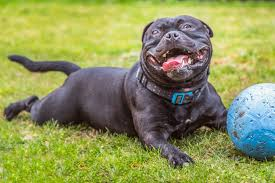

In [7]:
# Preprocess a test image
import PIL as pil
import requests
from io import BytesIO

img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dog.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))

img_t = preprocess(img)
img

In [8]:
# Transform it into input batches
batch_t = torch.unsqueeze(img_t, 0)
batch_t.size()

torch.Size([1, 3, 224, 224])

In [9]:
# Load ImageNet classes
class_url = "https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt"
response = requests.get(class_url)
content = BytesIO(response.content).getvalue().decode("utf-8")
lines = content.split('\n')[4:]
labels = [line.split(',')[1].strip() for line in lines]
print(labels)

['tench', 'goldfish', 'great_white_shark', 'tiger_shark', 'hammerhead', 'electric_ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house_finch', 'junco', 'indigo_bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water_ouzel', 'kite', 'bald_eagle', 'vulture', 'great_grey_owl', 'European_fire_salamander', 'common_newt', 'eft', 'spotted_salamander', 'axolotl', 'bullfrog', 'tree_frog', 'tailed_frog', 'loggerhead', 'leatherback_turtle', 'mud_turtle', 'terrapin', 'box_turtle', 'banded_gecko', 'common_iguana', 'American_chameleon', 'whiptail', 'agama', 'frilled_lizard', 'alligator_lizard', 'Gila_monster', 'green_lizard', 'African_chameleon', 'Komodo_dragon', 'African_crocodile', 'American_alligator', 'triceratops', 'thunder_snake', 'ringneck_snake', 'hognose_snake', 'green_snake', 'king_snake', 'garter_snake', 'water_snake', 'vine_snake', 'night_snake', 'boa_constrictor', 'rock_python', 'Indian_cobra', 'green_mamba', 'sea_snake', 'horned_viper', 'diamondback', 

In [10]:
# Run pretrained AlexNet on the test image and produce top 5 predictions
alex_net.eval()
out = alex_net(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Mexican_hairless', 51.60147476196289),
 ('Staffordshire_bullterrier', 24.207393646240234),
 ('German_short-haired_pointer', 3.90851092338562),
 ('Labrador_retriever', 3.767028331756592),
 ('American_Staffordshire_terrier', 3.0548365116119385)]

In [11]:
# Run pretrained ResNet101 on the test image and produce top 5 predictions
res_net_101.eval()
out = res_net_101(batch_t)
out_perc = torch.nn.functional.softmax(out, dim=1)[0] * 100

sorted_scores, sorted_indices = torch.sort(out, descending=True)

[(labels[i], out_perc[i].item()) for i in sorted_indices[0][:5]]

[('Staffordshire_bullterrier', 54.67280197143555),
 ('pug', 17.931232452392578),
 ('French_bulldog', 16.752490997314453),
 ('bull_mastiff', 3.839614152908325),
 ('Brabancon_griffon', 3.1417016983032227)]

### Generating fake real-looking images using GAN networks (CycleGAN)

GAN game is an adversial process that two networks are competing each other in a cheating game, where the "generator" network is the cheater while the "discriminator" network is the wiseman. When succeeding, the "generator" network can produce real-looking images that the "discriminator" network cannot discern.

The process of GAN game

> ![dl_pytorch_c2_3_gan](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_3_gan.png)

#### CycleGAN

Different from normal GAN network, CycleGAN can learn to generate fake images in a different domain using training data from two different domains datasets.

The process of CycleGAN game

> ![](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_4_cyclegan.png)


In [12]:
# The implementation of CycleGAN generator using ResNet

import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3>

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

In [13]:
# The structure of the generator is complicated.

netG = ResNetGenerator()
netG

ResNetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d(3, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (3): ReLU(inplace=True)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    (9): ReLU(inplace=True)
    (10): ResNetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
        (3): ReLU(inplace=True)
        (4): ReflectionPad2d((1, 1, 1, 1))
     

In [14]:
# Load pretrained horse-to-zebra CycleGAN model parameters

model_url = 'https://github.com/deep-learning-with-pytorch/dlwpt-code/raw/master/data/p1ch2/horse2zebra_0.4.0.pth'
response = requests.get(model_url)
model_data = torch.load(BytesIO(response.content))
netG.load_state_dict(model_data)

<All keys matched successfully>

In [15]:
# Again, prepare the preprocessing transforms for input images
# A simple resize is good enough

preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.ToTensor()
])

In [ ]:
# Load our test images we downloaded

img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/horse.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))
img

In [ ]:
# Prepare the image as network input
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

In [ ]:
# Run the pretrained generator on the image
netG.eval()
batch_out = netG(batch_t)

# Transform the output back to an image
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = vis.transforms.ToPILImage()(out_t)
out_img

### Generating scene description using captioning model
 The captioning model uses RNN (Recurrent neural network) model for text generation, prepended with a CNN model for image classification.
"Recurrent" means the output of previous forward pass will serve as the input of the current forward pass.
> ![dl_pytorch_c2_5_caption](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c2_5_caption.png)


In [ ]:
# run the pretrained model, it will run the two image examples we used before and also the zebra image we generated using the CycleGAN model
!cd ../ImageCaption.pytorch && python eval.py --model ./data/FC/fc-model.pth --infos_path ./data/FC/fc-infos.pkl --image_folder ../jupyter_notebook_articles/images/

In [ ]:
# Display the results
import json
from IPython.display import display
with open('../ImageCaption.pytorch/vis/vis.json', mode='r') as f:
    result = json.load(f)
img_files = [os.path.join('../jupyter_notebook_articles/images/', name) for name in os.listdir('../jupyter_notebook_articles/images/')]

for caption, img_file in zip(result, img_files):
    img = pil.Image.open(img_file)
    display(img)
    print(caption['caption'])

### Use models via pytorch hub




In [23]:
!pip install hydra-core
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 6.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=2ccf1f90ac62771523ca8bf52372d0eea4af0fa9764ebff24ea58bc87ab7402d
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


In [25]:
!pip install bitarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 3.7 MB/s eta 0:00:00


In [26]:
import torch
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')

Using cache found in /root/.cache/torch/hub/pytorch_fairseq_main


TypeError: cannot unpack non-iterable NoneType object

In [28]:
!pip install --upgrade fairseq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.8/123.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fairseq: filename=fairseq-0.12.2-cp310-cp310-linux_x86_64.whl size=11291821 sha256=ee673359f2919e00006c8556f2d6c99776ac2c24b5402713a9142b3d2a266a81
  Stored in directory: /root/.cache/pip/wheels/e4/35/55/9c66f65ec7c83fd6fbc2b9502a0ac81b2448a1196159dacc32
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141210 sha256=94ee068c4ab97d6ef7834dfdce07ab1cc12a2f870a910003081e2a93e6ddb7

In [29]:
import torch
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')

Using cache found in /root/.cache/torch/hub/pytorch_fairseq_main


TypeError: cannot unpack non-iterable NoneType object

In [30]:
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli', force_reload=True)

Downloading: "https://github.com/pytorch/fairseq/zipball/main" to /root/.cache/torch/hub/main.zip


TypeError: cannot unpack non-iterable NoneType object

In [ ]:
# Use the roberta model to transform a sentence to vector representation
tokens = roberta.encode('I am running!')
print(tokens.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens)

In [ ]:
tokens2 = roberta.encode('I am walking!')
print(tokens2.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens2)

In [ ]:
tokens3 = roberta.encode('I run very fast!')
print(tokens3.tolist())
# The vector representation can be converted back to the text
roberta.decode(tokens3)

In [ ]:
# The RoBERTa model can also be used to classify if two sentences have similar or contradictory meanings
with torch.no_grad():
    inputs = ['I am running!', 'I am walking!']
    tokens = roberta.encode(*inputs)
    prediction = roberta.predict('mnli', tokens).argmax().item()
    print(prediction) # 0 means contradictory

    inputs = ['I am running!', 'I run very fast!']
    tokens = roberta.encode(*inputs)
    prediction = roberta.predict('mnli', tokens).argmax().item()
    print(prediction) # 1 means similar

### Practices

In [ ]:
# Run horse2zebra on the dog image, we'll have to use the preprocess transforms for CycleGAN
preprocess = vis.transforms.Compose([
    vis.transforms.Resize(256),
    vis.transforms.ToTensor()
])

img_url = 'https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dog.jpg'
response = requests.get(img_url)
img = pil.Image.open(BytesIO(response.content))
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)

batch_out = netG(batch_t)
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
vis.transforms.ToPILImage()(out_t)

In [ ]:
# Load the google trend til today
import datetime as dt
import pandas as pd
trend = pd.read_csv('https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/data/google_trend_pytorch_hub.csv', parse_dates=[0])
# Plot the trend
trend.plot(x='Month', y=1)

In [ ]:
# Let's see which countries top the trend
import pandas as pd
region = pd.read_csv('https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/data/google_trend_pytorch_hub_region.csv', header=0).fillna(0)
region.head(n=5)

## All as tensors
Tensors are multidimensional, floating-point array. Deep learning may be viewed as numerical transformations of tensors.

> ![dl_pytorch_c3_0](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_0.png)

Tensors serve as representations for data with arbitrary dimensions.

> ![dl_pytorch_c3_1](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_1.png)

### Comparison between Pytorch tensors and NumPy arrays.

* Both can represent data with arbitrary dimensions.
* Both support rich manipulations on the data and share almost the same APIs.
* Pytorch supports GPU accelerated operations directly on the tensors.
* Pytorch supports backtracing of the computational graph applied on the tensors.
* NumPy has exellent companion extension libraries such as SciPy, Scikit-learn, and Pandas.
* Pytorch tensors can be easily converted back and forth with NumPy arrays.

In [ ]:
import torch
# Create 1 x 4 all-one tensor
a = torch.tensor(range(4)) + 1
print(a)
# Indexing
a[0]
# Change values via assignment, notice how the value of b has also been changed.
b = a[1]
a[1] = 0
print(a)
print(b)
# Check type of the data, indexing returns a 0-dimensional tensor a.k.a the scalar
print(type(a[1]))
# Convert the 0-dimensional tensor to a python number
print(float(a[1]))
# check the memory address

# create another tensor in 2D
c = a.reshape(2, 2)
print(c.shape)

# Truly copy the tensor
d = a.clone()
d[1] = 2
print(d)
print(a)

Tensors and NumPy arrays are contiguous byte blocks in memory, different from python list object, in which each item is stored separately in memory.

> ![dl_pytorch_c3_2](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_2.png)

Tensors are views of the underlying `torch.Storage` instances. Therefore, two tensors may share the same `Storage` instance while indexing to it in different ways.

> ![dl_pytorch_c3_3](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_3.png)


In [ ]:
# You may access the underlying storage instance by the Storage method
# The storage is regardless of the tensor's dimensions and always stores all data as a single 1-dimensional contiguous array.
print(a.storage())
print(b.storage())
print(c.storage())
print(d.storage())
# The storage is indexable
print(a.storage()[0])
print(c.storage()[0])

Tensors use `size`, `offset`, and `stride` to define the indexing rules to the underlying storage instance.

> ![dl_pytorch_c3_4](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_4.png)

> "The __size__ (or shape, in NumPy parlance) is a tuple indicating how many elements across each dimension the tensor represents. The storage
__offset__ is the index in the storage corresponding to the first element in the tensor.
The __stride__ is the number of elements in the storage that need to be skipped over to
obtain the next element along each dimension."

Most tensor shape or indexing transformations do not require memory reallocation of data, but simply math transformation on `size`, `offset`, and `stride`.

For example, when applying transpose to a tensor, there will be no memory reallocation of data. Instead, the values in the stride tuple will be swapped.

> ![dl_pytorch_c3_5](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_5.png)


---

In [ ]:
# Check the different size, offset, and stride in two tensors with the same underlying storage instance
print(a.shape, a.storage_offset(), a.stride())
print(c.shape, c.storage_offset(), c.stride())

### Name the tensor dimensions and dimension matching.

In [ ]:
# A typical single RGB image tensor, 3 channels x 100 x 100
img_t = torch.randn(3, 5, 5)
weights = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels']) # These value will be applied to each channel
print(weights)
# A typical batch of RGB images tensor, 12 batches x 3 channels x 100 x 100
batch_t = torch.randn(2, 3, 5, 5)
# The index of the channel dimension is different in img_t and batch_t
# We better add consistent names to img_t and batch_t
img_t = img_t.refine_names('channels', 'width', 'height')
print(img_t.names)
batch_t = batch_t.refine_names(None, 'channels', 'width', 'height')
print(batch_t.names)
# Convert the RGB image to grayscale
# First make sure the weights tensor has the same dimension as img_t
weights_aligned = weights.align_as(img_t)
print(weights_aligned.shape, weights_aligned.names)
# Apply transformation
grayscale_t = (img_t * weights_aligned).sum('channels')
print(grayscale_t.shape, grayscale_t.names)
# Convert the grayscale to have the channel dimension
grayscale_t = grayscale_t.align_as(img_t)
print(grayscale_t.shape, grayscale_t.names)

# Note that not all operations support named tensors, so you have to know how to convert it back to unnamed tensors
grayscale_t = grayscale_t.rename(None)
print(grayscale_t.shape, grayscale_t.names)

### Tensor data types and impact on model performance

Pytorch supports floating and integer data types as NumPy supported. While most modern CPU uses at least 32-bit floating point numbers, modern GPUs can support 16-bit floating point numbers. Integer tensors will always be created with `int64` type, this can support large scale indexing for tensors with millions of elements.

The performance impacted by data types.

* 64-bit floating point numbers do not really improve the performance over 32-bit floating point numbers.
* 16-bit floating point numbers can cut model size into half with slight sacrifice in the performance.

### Contiguous tensors
 Contiguous is the term used to indicate that the memory layout of a tensor does not align with its advertised meta-data or shape information.
This basically means the order of each data in the memory matches the order of the meta-data of the tensor (size, offset, stride). So a contiguous tensor typically is the tensor when being first created and has not been applied any transformations that change the values of stride, size or offset.

In [ ]:
### Check contiguous status
print(a.is_contiguous())
print(b.is_contiguous())
print(c.is_contiguous())
print(d.is_contiguous())
# transpose
e = c.transpose(0, 1)
print(c.stride())
print(e.stride())
print(e.is_contiguous())

In [ ]:
# To GPU, no GPU available so error raised
test = torch.rand(3)
try:
    test.to(device='cuda:0')
except AssertionError as e:
    print(e)

# To NumPy
test_np = test.numpy()
print(test_np.dtype)

# From NumPy
import numpy as np
test_np = np.random.rand(3)
print(test_np.dtype)
test = torch.from_numpy(test_np)
print(test.dtype)
test = test.to(dtype=torch.float32)
print(test.dtype)

PyTorch uses dispatching mechanism to make the operations are interoperational over data stored on different backends.

> ![dl_pytorch_c3_6](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c3_6.png)

### Conditional indexing on tensors

We may use bool tensor as indices to index the tensors.

In [ ]:
# Create a tensor
a = torch.tensor([[1, 2, 3], [4, 5, 6]]).float()
print(a.shape, a.dtype)
# Indexing the the first row using bool array
mask = torch.tensor([1, 0]).bool()
print(mask.shape, mask.dtype)
first_row = a[mask, :]
print(first_row)

# Create bool array using comparison operators
mask2 = a < 3
a_lt_2 = a[mask2]
print(a_lt_2)

In [ ]:
# Save as pickle
torch.save(a, 'a.t')
# Load pickle
a = torch.load('a.t')
print(a)
os.remove('a.t')

In [ ]:
# Save as hdf5
import h5py
with h5py.File('a.hdf5', 'w') as f:
    dset = f.create_dataset('test', data=a.numpy())

# Load hdf5
with h5py.File('a.hdf5', 'r') as f:
    test_h5 = f['test']
    print(torch.from_numpy(test_h5[:]))
os.remove('a.hdf5')

In [ ]:
# cos needs float pointing number
a_32 = a.to(torch.float32)
print(a_32.cos())
print(a_32.sqrt())
print(a_32.storage())
# inplace
torch.cos(a_32, out=a_32)
print(a_32.storage())
# or
a_32.cos_()
print(a_32.storage())

In [ ]:
# Read in an image
import imageio
import torch
img = imageio.imread('https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dog.jpg')
# shape is in height x width x channels
print(img.shape)
# pytorch tensors should have the dimensions formed as channels x height x width, so we need to rearrange the dimensions
img_t = torch.from_numpy(img)
print(img_t.shape)
# rearrange
img_t = img_t.permute(2, 0, 1)
print(img_t.shape)
# Put the image in a batch by adding a new dimension at dimension 0, for pytorch it becomes batch x channels x height x width
batch_t = img_t.unsqueeze(0)
batch_t = batch_t.expand(5, -1, -1, -1)
print(batch_t.shape)
# Or create a batch_t at first and then copy the image to the batch
batch_t = torch.zeros(5, 3, 183, 275)
batch_t[0] = img_t
print(batch_t.shape)
# Images by default are stored as unsigned 8-bit integers.
print(batch_t[0, 0, 0, 0].dtype)
# We need to convert them into floating point numbers.
batch_t = batch_t.float()
print(batch_t[0, 0, 0, 0].dtype)
# And better normalize them to [0, 1] or [-1, 1] which is required for efficient optimization when training the neural network
# Normalize them to [0, 1]
batch_t = batch_t / 255.0
# Standardize them to have zero mean and unit standard variation
# The mean is computed for each channel across the batch
mean_c_t = batch_t.mean([0, 2, 3]).unsqueeze(1).unsqueeze(1)
std_c_t = batch_t.std([0, 2, 3]).unsqueeze(1).unsqueeze(1)
print(mean_c_t.shape)
print(std_c_t.shape)
# Using broadcasting semantics, the trailing singleton dimensions (height, width) will be expanded automatically to do pointwise operations
n_batch_t = (batch_t - mean_c_t) / std_c_t
print(n_batch_t.mean([0, 2, 3])) # Close to 0, because this is numerical
print(n_batch_t.std([0, 2, 3]))

### Dealing with 3D images or videos
Example of 3D CT images

> ![dl_pytorch_c4_1](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c4_1.png)

### Dealing with tabular data

Pytorch tensors are homogeneous, but tabular data may include categorical, atomic data, which need to be converted to numerical data, usually with One-hot encoding.

By convention, the dimension of tabular data in PyTorch may be represented as `batch x channel`.

In [ ]:
# Load the wine quality tabular dataset
# !wget http://mng.bz/90Ol --no-check-certificate -O wine.csv

import pandas as pd
import numpy as np
wineq_pd = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', dtype=np.float32, delimiter=";",
skiprows=1)
wineq_numpy = wineq_pd.values
wineq = torch.from_numpy(wineq_numpy)
wineq.size()

In [ ]:
X = wineq[:, :-1]
y = wineq[:, -1].long()
X.shape, y.shape, X.dtype, y.dtype

In [ ]:
encoded_y = torch.zeros(y.shape[0], y.max() + 1)
print(y.unique())
encoded_y.scatter_(1, y.unsqueeze(1), 1.0)
encoded_y.shape, encoded_y.dtype

### Dealing with time series data

1. Time series tabular data

By convention, the dimensions of time series tabular data would typically be `batch x channel x time`, where each channel represents one feature.

2. Audio or sensor data

By convention, the dimensions of audio or sensor data (represented in spectrogram) would typically be `batch x channel x freq x time`, where channel is the "audio channel (e.g., left and right) or "axial channel" (e.g., x, y, and z for multiaxial sensors) and `freq x time` look like an image. Therefore, networks used for images may be used for audio tensors as well.

Some good tools and resources to deal with time series data in PyTorch.

### Dealing with text

Text needs to be converted to numbers, using embedding.

In [ ]:
import re
response = requests.get('https://www.gutenberg.org/files/1342/1342-0.txt')
text = BytesIO(response.content).getvalue().decode('utf-8')
text = text.lower().strip()
tokens = re.split('\n+', text)
print(tokens[1:5])
print(len(tokens), len(np.unique(tokens)))

In [ ]:
# Apply onehot encoding to each character for each line with ASCII encoding

# 128 ASCII characters
onehot_tokens = []
for token in tokens:
    token = token.lower().strip()
    onehot_token = torch.zeros(len(token), 128)
    # Use ord to get ASCII code for the character
    for i, c in enumerate(token):
        if ord(c) < 128:
            onehot_token[i][ord(c)] = 1
    onehot_tokens.append(onehot_token)

In [ ]:
# Apply onehot encoding to each word

### Encoding schemes

Encoding is needed for categorical data. Depending on whether ordering matters or not, the categorical data may be encoded as continuous values or onehot coded integers. More than that, variables may be encoded via **embedding** that converts categorical relational data (such as words) into numerical vectors, and use the distances between the encoded vectors to measure the similarity between the categorical data.

Here's the workflow for encoding different types of data as tensors for pytorch models, embedding is not included.

> ![dl_pytorch_c4_2](https://raw.githubusercontent.com/qutang/jupyter_notebook_articles/main/images/dl_pytorch_c4_2.png)
